In [1]:
import os 
import pandas as pd 
import numpy as np

In [2]:
os.getcwd()

'c:\\TCGA-LIHC'

Data Loading

In [3]:
# Load expression data
expr_data = pd.read_table("./gene_expression")
gene_list = expr_data['sample']
expr = expr_data.drop(['sample'],axis=1)
expr = expr.transpose()

t-SNE

In [4]:
from sklearn.manifold import TSNE

tsne_np = TSNE(n_components = 2).fit_transform(expr)

# Change Numpy Array to Dataframe
tsne_df = pd.DataFrame(tsne_np, columns = ['component 0', 'component 1'])

tsne_df

c:\Users\dmcb\anaconda3\envs\hek\lib\site-packages\sklearn\manifold\_t_sne.py:795: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
c:\Users\dmcb\anaconda3\envs\hek\lib\site-packages\sklearn\manifold\_t_sne.py:805: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


,component 0,component 1
0,0.354799,5.397218
1,9.370691,-12.033464
2,-3.840022,0.912758
3,10.848974,7.413116
4,7.210809,-1.606935
...,...,...
418,5.890817,-15.211604
419,6.731930,-1.974985
420,-5.882180,6.525591
421,11.989228,0.895023


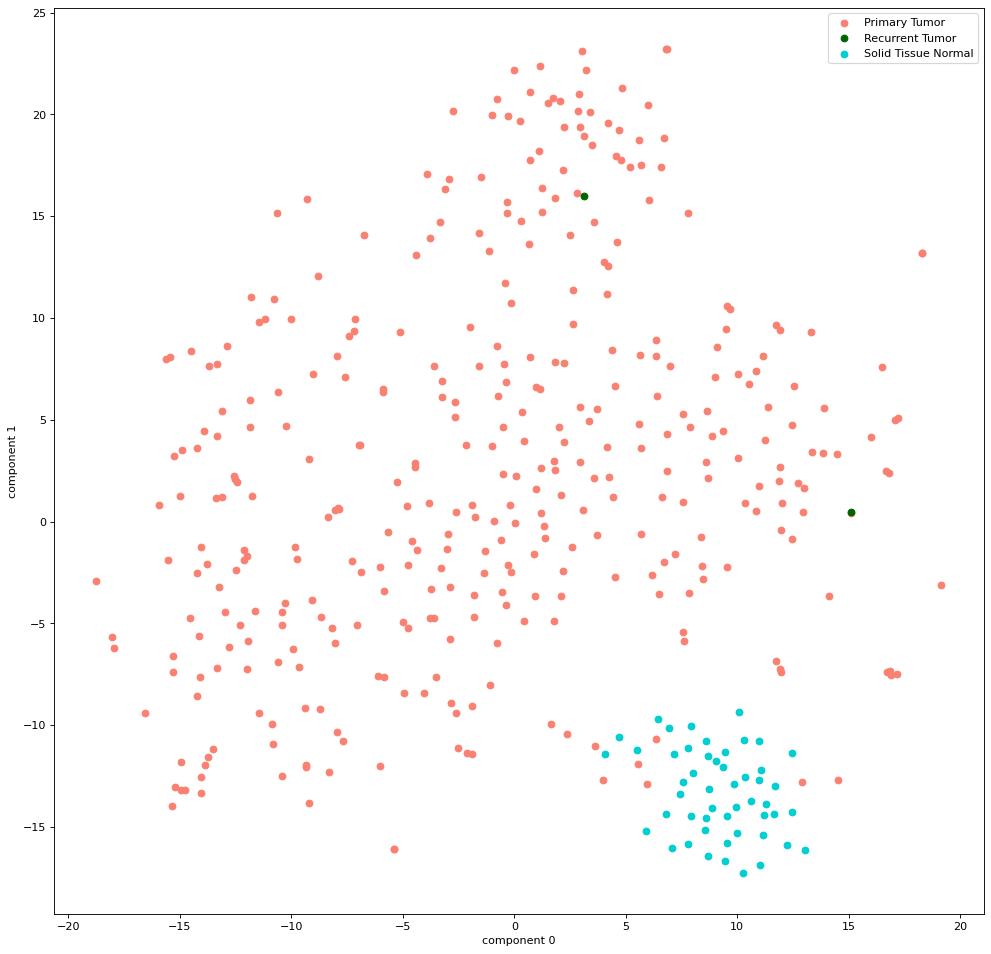

In [15]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

figure(figsize=(15, 15), dpi=80)

# Load clinical data
clinical_data = pd.read_table("./TCGA.LIHC.sampleMap_LIHC_clinicalMatrix")
idx = []
for sample in expr.index:
    sampleID_list = clinical_data['sampleID'].tolist()
    tmp = sampleID_list.index(sample)
    idx.append(tmp)

clinical_core = clinical_data.reindex(idx)
clinical_core = clinical_core['sample_type']

clinical_core = clinical_core.to_numpy()

# Set group
tsne_df['target'] = clinical_core

tsne_df_0 = tsne_df[tsne_df['target'] == 'Primary Tumor']
tsne_df_1 = tsne_df[tsne_df['target'] == 'Recurrent Tumor']
tsne_df_2 = tsne_df[tsne_df['target'] == 'Solid Tissue Normal']

# Visualization
plt.scatter(tsne_df_0['component 0'], tsne_df_0['component 1'], color = 'salmon', label = 'Primary Tumor')
plt.scatter(tsne_df_1['component 0'], tsne_df_1['component 1'], color = 'darkgreen', label = 'Recurrent Tumor')
plt.scatter(tsne_df_2['component 0'], tsne_df_2['component 1'], color = 'darkturquoise', label = 'Solid Tissue Normal')

plt.xlabel('component 0')
plt.ylabel('component 1')
plt.legend()
plt.show()